## KNN Practice

### A)
Read Data from your disk and make predictions using the KNN Classifier.

In [3]:
# importing packages

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
# read data

original_df = pd.read_csv('breast-cancer-wisconsin.data.txt')
cancer_df = pd.read_csv('breast-cancer-wisconsin.data.txt')

In [5]:
cancer_df

,id,par1,par2,par3,par4,par5,par6,par7,par8,par9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
# preprocessing

cancer_df.replace('?', -99999, inplace=True)
cancer_df.drop(columns=['id'], inplace=True)

In [7]:
# identify X and y

X = np.array(cancer_df.drop(columns=['class']))
y = np.array(cancer_df['class'])

In [8]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [9]:
# training data
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9714285714285714


In [11]:
data = np.array([4,3,3,2,1,2,1,1,2])
prediction = clf.predict(data.reshape(1,-1))
print(prediction)

[2]


## Task 1
Change number of neighbors
(ie, K) and test the accuracy of
both training and testing - print
results.

In [12]:
clf_2 = KNeighborsClassifier(n_neighbors=2)
clf_2.fit(X_train, y_train)
clf_3 = KNeighborsClassifier(n_neighbors=3)
clf_3.fit(X_train, y_train)
clf_4 = KNeighborsClassifier(n_neighbors=4)
clf_4.fit(X_train, y_train)
clfs = [clf_2, clf_3, clf_4]

In [13]:
for i in clfs:
    print(i.score(X_train, y_train))
    print(i.score(X_test, y_test))


0.9770992366412213
0.96
0.9770992366412213
0.9771428571428571
0.9751908396946565
0.9828571428571429


## Task 2
Try NOT to drop the ‘id’
column then evaluate both
training and testing outcomes
(scores).

In [14]:
task_2_df = original_df.copy()

task_2_df.replace('?', -99999, inplace=True)
X_task_2 = np.array(task_2_df.drop(columns=['class']))
y_task_2 = np.array(task_2_df['class'])

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_task_2, y_task_2, random_state=0)

In [15]:
clf_task_2 = KNeighborsClassifier(n_neighbors=2)
clf_task_2.fit(X_train_2, y_train_2)

KNeighborsClassifier(n_neighbors=2)

In [16]:
print(clf_task_2.score(X_train_2, y_train_2))
print(clf_task_2.score(X_test_2, y_test_2))


0.8110687022900763
0.6171428571428571


You may notice that both scores
are less accurate, explain why?

id is not related to anything except identfication

## Task 3
Explore other parameters of
the KNeighborsClassifier
function, for instance, can we
apply Manhattan distance
instead of the Euclidean. If so,
test its use and compare with
the results you had earlier.

In [17]:
clf_2_task = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
clf_2_task.fit(X_train, y_train)
clf_3_task = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clf_3_task.fit(X_train, y_train)
clf_4_task = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
clf_4_task.fit(X_train, y_train)
clfs_task = [clf_2_task, clf_3_task, clf_4_task]

In [18]:
for i in clfs_task:
    print('train:',i.score(X_train, y_train))
    print('test:',i.score(X_test, y_test))

train: 0.9809160305343512
test: 0.9542857142857143
train: 0.982824427480916
test: 0.9714285714285714
train: 0.9770992366412213
test: 0.9771428571428571


### B)
Read Data from your disk and make predictions using the KNN Classifier.

In [19]:
training_acc = []
test_acc = []
# try n_neighbors from 1 to 10
n_neighbors_settings = range(1,11)

for n_neighbors in n_neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_acc.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_acc.append(clf.score(X_test, y_test))

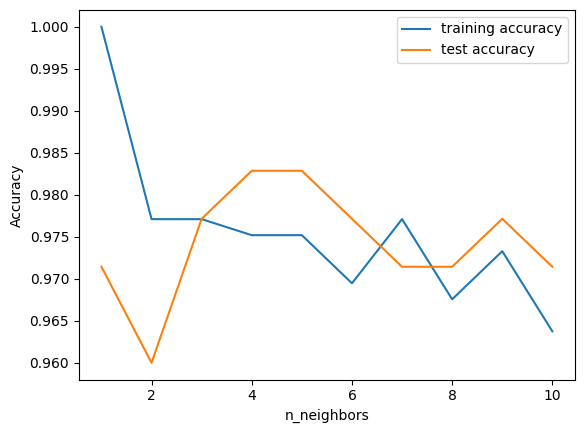

In [20]:
plt.plot(n_neighbors_settings, training_acc, label='training accuracy')
plt.plot(n_neighbors_settings, test_acc, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

1) If you run the code above you will produce a figure - print it or save it and discuss/explore what
it means. What is your understanding from the produced figure?

n_neigbors = 5 gives the best test accuracy

## C)
Do it again, now with breast cancer data loaded directly from sklearn

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [27]:
X_train

array([[1.387e+01, 2.070e+01, 8.977e+01, ..., 6.845e-02, 2.249e-01,
        8.492e-02],
       [1.757e+01, 1.505e+01, 1.150e+02, ..., 1.456e-01, 2.756e-01,
        7.919e-02],
       [1.330e+01, 2.157e+01, 8.524e+01, ..., 5.614e-02, 2.637e-01,
        6.658e-02],
       ...,
       [1.458e+01, 2.153e+01, 9.741e+01, ..., 2.701e-01, 4.264e-01,
        1.275e-01],
       [1.365e+01, 1.316e+01, 8.788e+01, ..., 8.056e-02, 2.380e-01,
        8.718e-02],
       [2.073e+01, 3.112e+01, 1.357e+02, ..., 1.659e-01, 2.868e-01,
        8.218e-02]])

In [32]:
# 1. Explore the data, the attributes, is there any missing data?
X_train_df = pd.DataFrame(X_train, columns=cancer.feature_names)
X_test_df = pd.DataFrame(X_test, columns=cancer.feature_names)

# Check for missing values in X_train
print("Missing values in X_train:")
print(X_train_df.isnull().sum())

# Check for missing values in X_test
print("\nMissing values in X_test:")
print(X_test_df.isnull().sum())

# Check if there are any missing values in y_train and y_test
print("\nMissing values in y_train:", np.isnan(y_train).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())

Missing values in X_train:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Missing values in X_test:
mean radius                0
mean texture               0
mean 

In [35]:
# 2 Fit a classifier (Knn) and evaluate accuracy corresponding to different “model” settings (K, distance, etc)
training_acc = []
test_acc = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_acc.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_acc.append(clf.score(X_test, y_test))

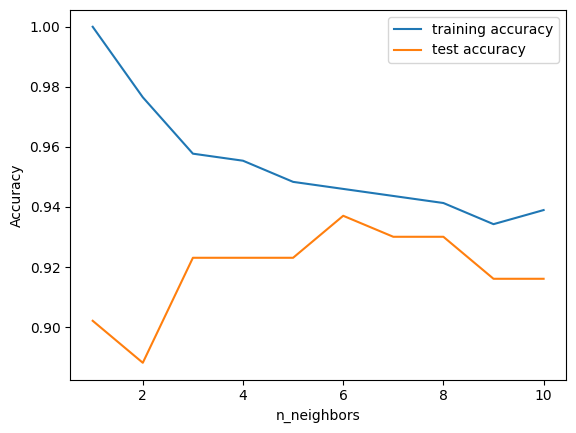

In [36]:
plt.plot(neighbors_settings, training_acc, label='training accuracy')
plt.plot(neighbors_settings, test_acc, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [37]:
training_acc = []
test_acc = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric='manhattan')
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_acc.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_acc.append(clf.score(X_test, y_test))

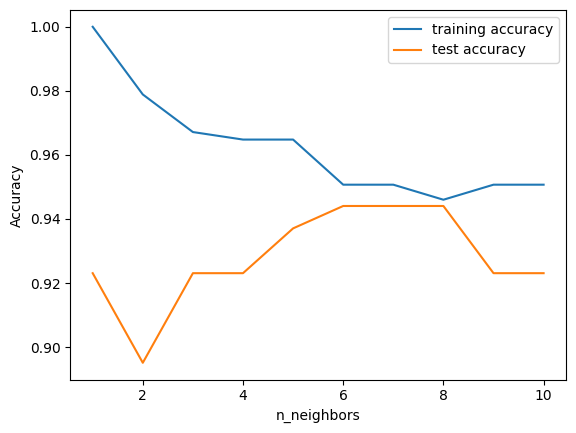

In [38]:
plt.plot(neighbors_settings, training_acc, label='training accuracy')
plt.plot(neighbors_settings, test_acc, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

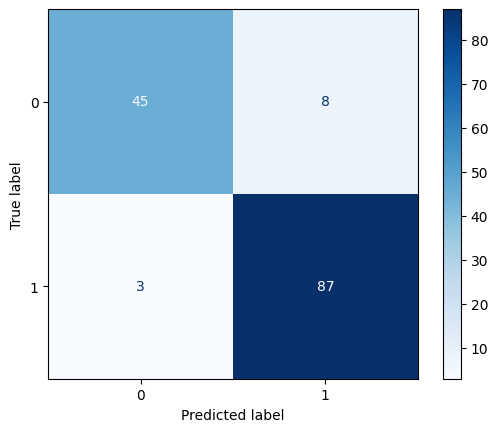

In [40]:
# 3 Do you remember Confusion Matrix (check material on Week 3) — execute the following snippet and discuss results.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your classifier 'clf' and have X_test and y_test

# Generate the confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [41]:
# 4) Can you produce F1 score on data test split
from sklearn.metrics import f1_score, precision_score, recall_score

y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9158
Recall: 0.9667
F1 Score: 0.9405


In [42]:
# 5. Check feature scales? —investigate sample central tendency and dispersion and explore sklearn methods to normalise dataset

# Load the dataset
cancer = load_breast_cancer()
X = cancer.data
feature_names = cancer.feature_names

# Create a DataFrame for easier analysis
df = pd.DataFrame(X, columns=feature_names)

# Display summary statistics
print(df.describe())

# Display range of each feature
print("\nFeature ranges:")
print(df.max() - df.min())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

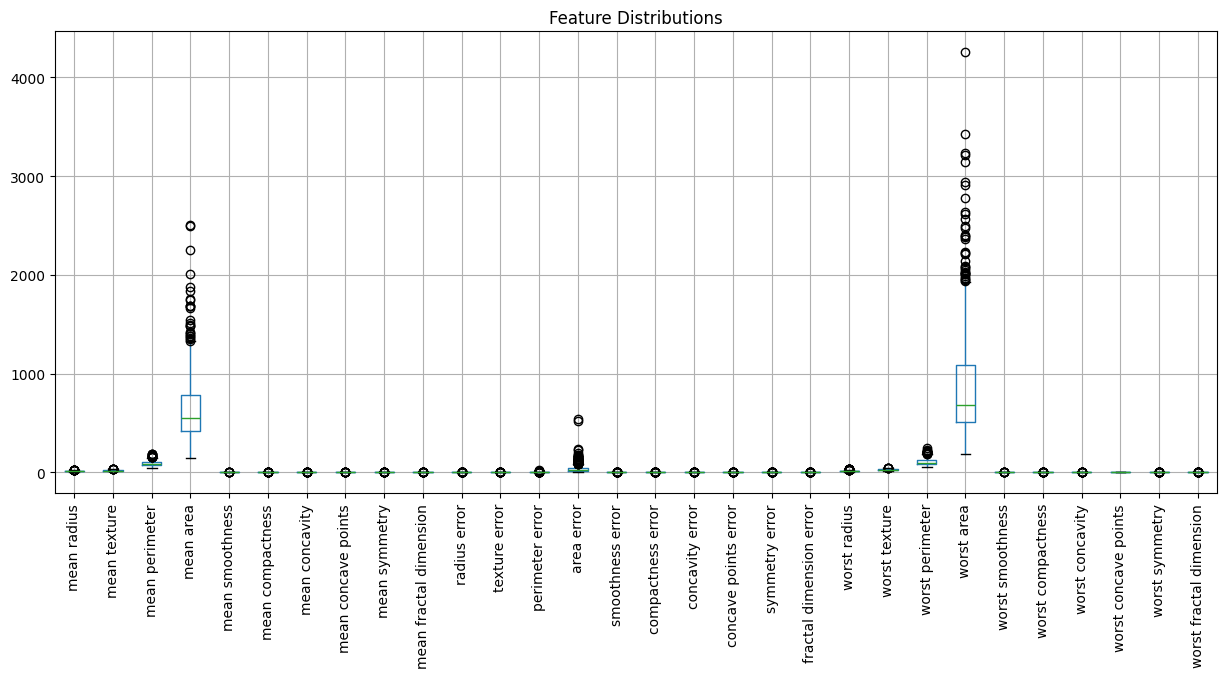

In [43]:
plt.figure(figsize=(15, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Feature Distributions")
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

       mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.338222      0.323965        0.332935    0.216920         0.394785   
std       0.166787      0.145453        0.167915    0.149274         0.126967   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223342      0.218465        0.216847    0.117413         0.304595   
50%       0.302381      0.308759        0.293345    0.172895         0.390358   
75%       0.416442      0.408860        0.416765    0.271135         0.475490   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.260601        0.208058             0.243137       0.379605   
std            0.161992        0.

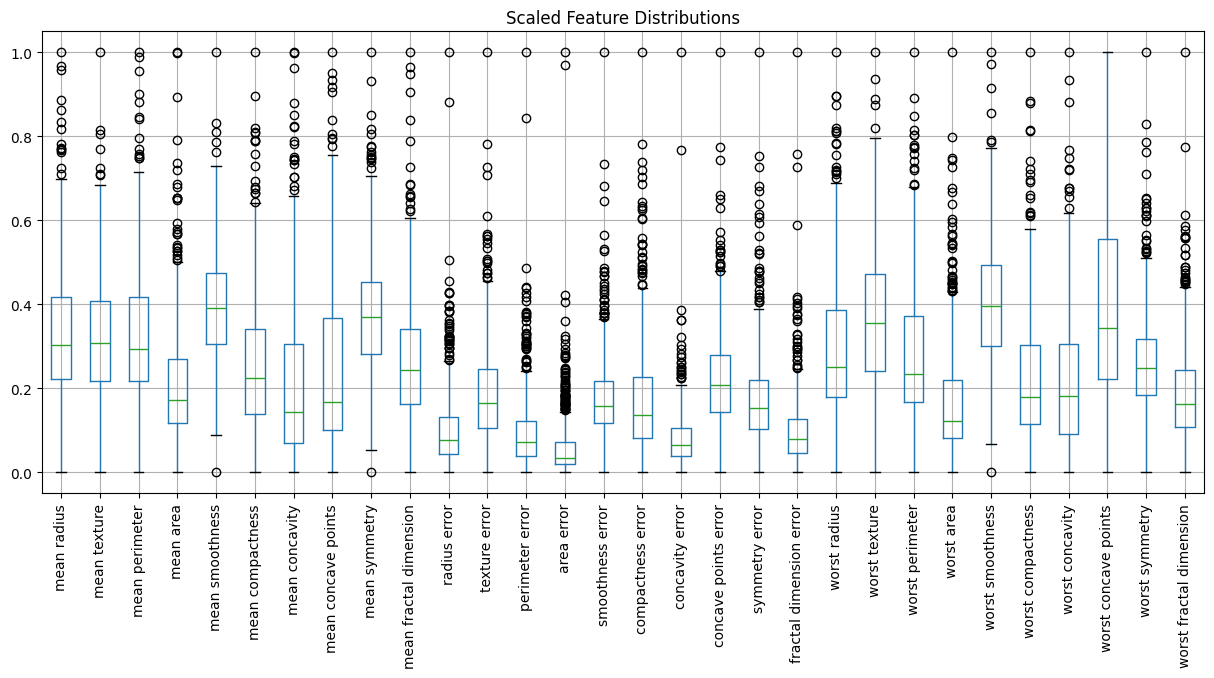

In [46]:
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
print(df_scaled.describe())

plt.figure(figsize=(15, 6))
df_scaled.boxplot()
plt.xticks(rotation=90)
plt.title("Scaled Feature Distributions")
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=66)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Model score with scaled features:", knn.score(X_test, y_test))

Model score with scaled features: 0.951048951048951


In [50]:
training_acc = []
test_acc = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_acc.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_acc.append(clf.score(X_test, y_test))

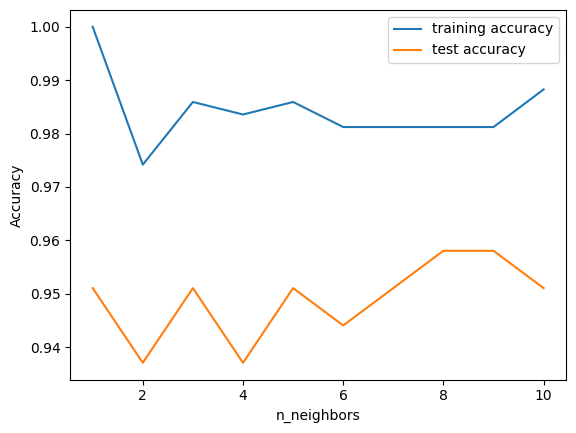

In [51]:
plt.plot(neighbors_settings, training_acc, label='training accuracy')
plt.plot(neighbors_settings, test_acc, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### Visualize Classifier's boundary

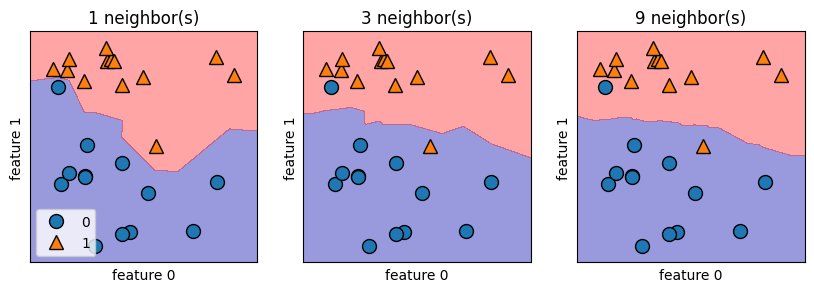

In [52]:
import mglearn

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)